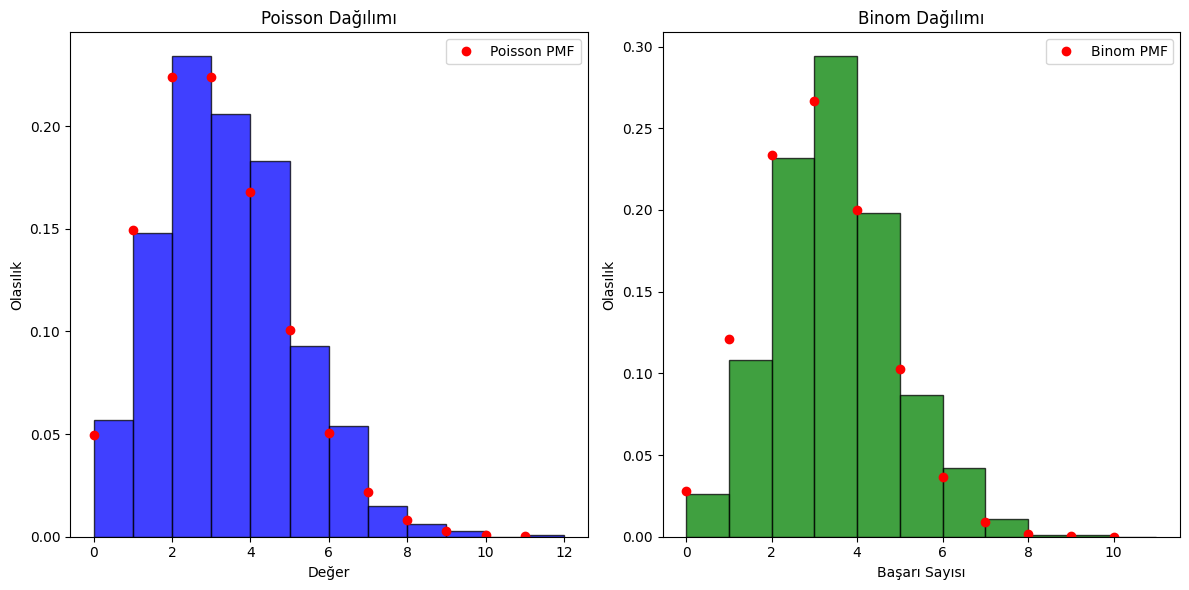

Poisson Dağılımı
Beklenen Ortalama: 3, Örnek Ortalama: 2.946
Beklenen Varyans: 3, Örnek Varyans: 2.939084

Binom Dağılımı
Beklenen Ortalama: 3.0, Örnek Ortalama: 3.027
Beklenen Varyans: 2.0999999999999996, Örnek Varyans: 2.0582710000000004


In [ ]:
import numpy as np
from scipy.stats import poisson, binom
import matplotlib.pyplot as plt

# Poisson dağılımını test etme
lambda_poisson = 3  # Poisson ortalaması
poisson_data = poisson.rvs(mu=lambda_poisson, size=1000)

# Binom dağılımını test etme
n_binom = 10  # Deneme sayısı
p_binom = 0.3  # Başarı olasılığı
binom_data = binom.rvs(n=n_binom, p=p_binom, size=1000)

# Histogramları çizme
plt.figure(figsize=(12, 6))

# Poisson dağılımı
plt.subplot(1, 2, 1)
plt.hist(poisson_data, bins=range(0, max(poisson_data)+2), alpha=0.75, color="blue", edgecolor="black", density=True)
x = np.arange(0, max(poisson_data)+1)
plt.plot(x, poisson.pmf(x, mu=lambda_poisson), 'o', color="red", label="Poisson PMF")
plt.title("Poisson Dağılımı")
plt.xlabel("Değer")
plt.ylabel("Olasılık")
plt.legend()

# Binom dağılımı
plt.subplot(1, 2, 2)
plt.hist(binom_data, bins=range(0, n_binom+2), alpha=0.75, color="green", edgecolor="black", density=True)
x = np.arange(0, n_binom+1)
plt.plot(x, binom.pmf(x, n=n_binom, p=p_binom), 'o', color="red", label="Binom PMF")
plt.title("Binom Dağılımı")
plt.xlabel("Başarı Sayısı")
plt.ylabel("Olasılık")
plt.legend()

plt.tight_layout()
plt.show()

# Ortalama ve varyans hesaplama
print("Poisson Dağılımı")
print(f"Beklenen Ortalama: {lambda_poisson}, Örnek Ortalama: {np.mean(poisson_data)}")
print(f"Beklenen Varyans: {lambda_poisson}, Örnek Varyans: {np.var(poisson_data)}")

print("\nBinom Dağılımı")
print(f"Beklenen Ortalama: {n_binom * p_binom}, Örnek Ortalama: {np.mean(binom_data)}")
print(f"Beklenen Varyans: {n_binom * p_binom * (1 - p_binom)}, Örnek Varyans: {np.var(binom_data)}")


In [ ]:
import numpy as np
import math
from scipy.stats import chi2, binom

np.set_printoptions(precision=3)

# Veriler
x_i = np.array([0, 1, 2, 3, 4])
f_i = np.array([211, 90, 19, 5, 0])
n = f_i.sum()  # Toplam kitap sayısı

# Lambda (ortalama hata sayısı) hesaplama
lambda_hat = (x_i * f_i).sum() / n
print(f"Lambda (ortalama): {lambda_hat}")

# Poisson dağılımı için beklenen frekanslar (E_i) hesaplama
poisson_probs = np.array([(lambda_hat**x * np.exp(-lambda_hat) / math.factorial(x)) for x in x_i])
expected_frequencies_poisson = n * poisson_probs
print(f"Poisson olasılıkları: {poisson_probs}")
print(f"Poisson beklenen frekanslar: {expected_frequencies_poisson}")

# Poisson için Chi-Kare Hesaplama
grouped_frequencies_poisson = ((f_i - expected_frequencies_poisson) ** 2 / expected_frequencies_poisson)
chi_square_poisson = grouped_frequencies_poisson.sum()
print(f"Poisson Chi-Kare: {chi_square_poisson}")

# Poisson için serbestlik derecesi ve kritik değer
degrees_of_freedom_poisson = len(grouped_frequencies_poisson) - 1 - 1
critical_value_poisson = chi2.ppf(0.95, degrees_of_freedom_poisson)
print(f"Poisson Serbestlik Derecesi: {degrees_of_freedom_poisson}")
print(f"Poisson Kritik Değer: {critical_value_poisson}")

if critical_value_poisson > chi_square_poisson:
    print("H0 hipotezi reddedilemez (Poisson dağılımına uyar).")
else:
    print("H0 hipotezi reddedilir (Poisson dağılımına uymaz).")

# Binom dağılımı için p değeri hesaplama
p_hat = (x_i * f_i).sum() / (n * x_i.max())
print(f"Binom için p tahmini: {p_hat}")

# Binom dağılımı için beklenen frekanslar (E_i) hesaplama
binom_probs = np.array([binom.pmf(x, x_i.max(), p_hat) for x in x_i])
expected_frequencies_binomial = n * binom_probs
print(f"Binom olasılıkları: {binom_probs}")
print(f"Binom beklenen frekanslar: {expected_frequencies_binomial}")

# Binom için Chi-Kare Hesaplama
grouped_frequencies_binomial = ((f_i - expected_frequencies_binomial) ** 2 / expected_frequencies_binomial)
chi_square_binomial = grouped_frequencies_binomial.sum()
print(f"Binom Chi-Kare: {chi_square_binomial}")

# Binom için serbestlik derecesi ve kritik değer
degrees_of_freedom_binomial = len(grouped_frequencies_binomial) - 1 - 1
critical_value_binomial = chi2.ppf(0.95, degrees_of_freedom_binomial)
print(f"Binom Serbestlik Derecesi: {degrees_of_freedom_binomial}")
print(f"Binom Kritik Değer: {critical_value_binomial}")

if critical_value_binomial > chi_square_binomial:
    print("H0 hipotezi reddedilemez (Binom dağılımına uyar).")
else:
    print("H0 hipotezi reddedilir (Binom dağılımına uymaz).")

Lambda (ortalama): 0.44
Poisson olasılıkları: [0.644 0.283 0.062 0.009 0.001]
Poisson beklenen frekanslar: [209.312  92.097  20.261   2.972   0.327]
Poisson Chi-Kare: 1.851232739120602
Poisson Serbestlik Derecesi: 3
Poisson Kritik Değer: 7.814727903251179
H0 hipotezi reddedilemez (Poisson dağılımına uyar).
Binom için p tahmini: 0.11
Binom olasılıkları: [6.274e-01 3.102e-01 5.751e-02 4.738e-03 1.464e-04]
Binom beklenen frekanslar: [2.039e+02 1.008e+02 1.869e+01 1.540e+00 4.758e-02]
Binom Chi-Kare: 9.23246584475529
Binom Serbestlik Derecesi: 3
Binom Kritik Değer: 7.814727903251179
H0 hipotezi reddedilir (Binom dağılımına uymaz).
